In [7]:
import os

In [8]:
%pwd

'c:\\Users\\diban\\Documents\\End-end ML project with MLFlow\\End-end-Projects-with-MLFlow\\research'

In [9]:
os.chdir("../")

In [10]:
%pwd

'c:\\Users\\diban\\Documents\\End-end ML project with MLFlow\\End-end-Projects-with-MLFlow'

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("artifacts/data_ingestion/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
#checking nulls

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
#checking the data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [15]:
#checking data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

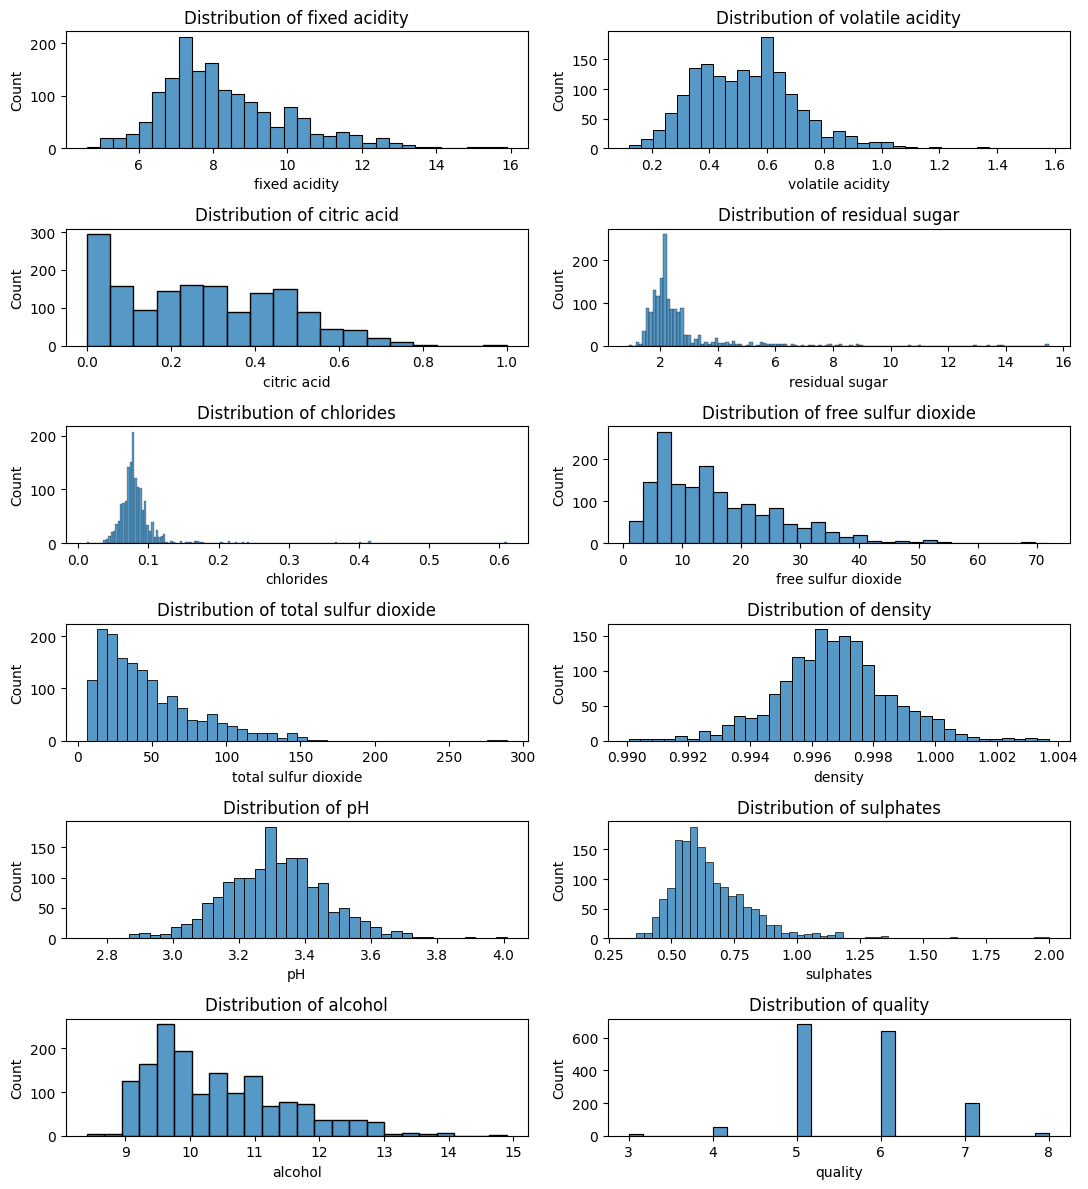

In [20]:
#visualizinng the distribution

x = 1
plt.figure(figsize=(11, 12))
for i in df.columns:
    plt.subplot(6, 2, x) 
    sns.histplot(df[i])
    plt.title(f"Distribution of {i}")
    x += 1  
plt.tight_layout()
plt.show()

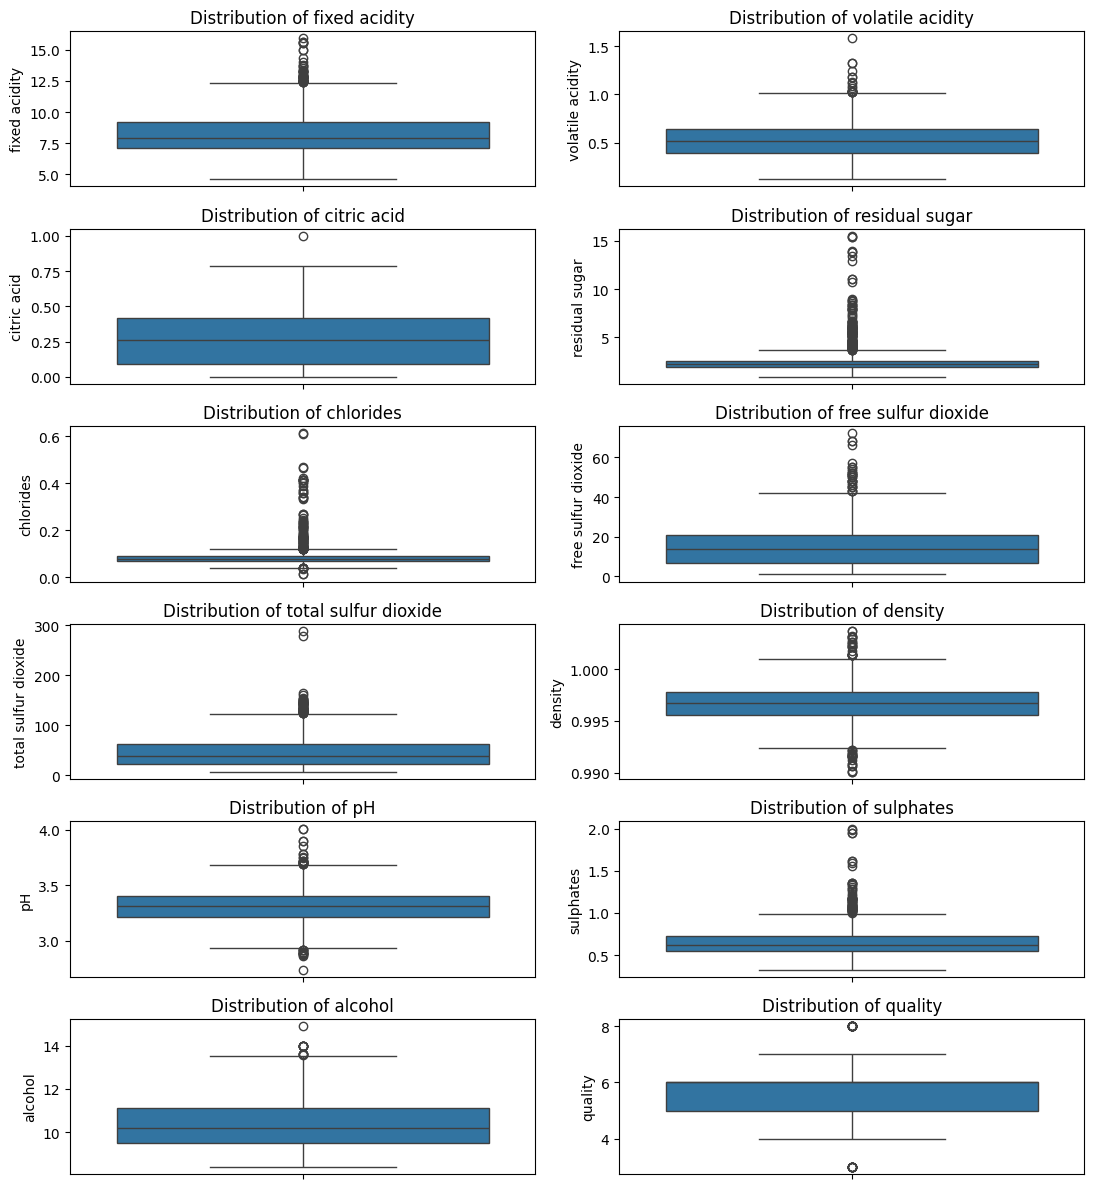

In [21]:

x = 1
plt.figure(figsize=(11, 12))
for i in df.columns:
    plt.subplot(6, 2, x) 
    sns.boxplot(df[i])
    plt.title(f"Distribution of {i}")
    x += 1  
plt.tight_layout()
plt.show()

In [31]:
corr_quality = df.corr()['quality']
corr_quality

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

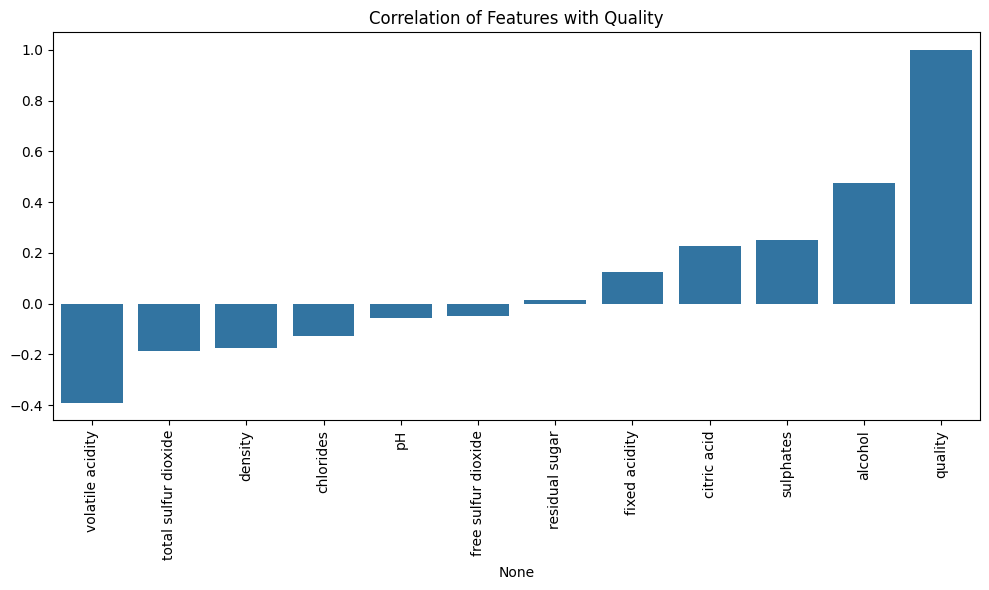

In [33]:
# Calculate the correlation of each column with 'quality'

corr_quality_sorted = corr_quality.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_quality_sorted.index, y=corr_quality_sorted.values)
plt.title('Correlation of Features with Quality')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [38]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen = True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict

In [39]:
from src.ML_Project.constants import *
from src.ML_Project.utils.common import read_yaml, create_directories


In [44]:
class ConfigurationManager:
    def __init__(self,
                 config_filepath = CONFIG_FILE_PATH
                     ,params_filepath = PARAMS_FILE_PATH
                         ,schema_filepath = SCHEMA_FILE_PATH ):
        
        self.config = read_yaml(config_filepath)
        self.params =read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)
        
        create_directories([self.config.artifacts_root]) #creating the artifact_root path
        
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation #this is reading the yaml file which points to config file and open the data_ingestion with conffig box
        schema = self.schema.COLUMNS
        
        create_directories([config.root_dir]) #using this function from common ro create dictionary accessed from the #self.config.data_ingestion above
        
        
        data_validation_config = DataValidationConfig(
                unzip_data_dir = config.unzip_data_dir,
                STATUS_FILE= config.STATUS_FILE,
                root_dir= config.root_dir,
                all_schema = schema
        )#loading the container
        
        return data_validation_config 

In [45]:
import os
from src.ML_Project import Logger

In [46]:
class DataValidation:
    def __init__(self,config: DataValidationConfig):
        self.config =config
        
    def validate_all_columns(self)->bool:
        try:
            validation_status =None
            
            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols =list(data.columns)
        
            all_schema =self.config.all_schema.keys()
            
            
            for col in all_cols:
                if col not in all_schema:
                    validation_status =False
                    with open(self.config.STATUS_FILE,"w") as f:
                        f.write(f"Validation status: {validation_status}")
                        
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, "w") as f:
                        f.write(f"validation status: {validation_status}")
            return validation_status
        except Exception as e:
            raise e
            

In [43]:
try:
    config = ConfigurationManager()
    data_validation_config =config.get_data_validation_config()
    data_validation = DataValidation(config =data_validation_config)
    data_validation.validate_all_columns()
    
except Exception as e:
    raise e
    

[2025-01-17 13:32:18,772:INFO:yaml file :config\config.yaml loaded successfully]
[2025-01-17 13:32:18,787:INFO:yaml file :params.yaml loaded successfully]
[2025-01-17 13:32:18,798:INFO:yaml file :schema.yaml loaded successfully]
[2025-01-17 13:32:18,804:INFO:created directory at: artifacts]
[2025-01-17 13:32:18,807:INFO:created directory at: artifacts/data_validation]


TypeError: DataValidationConfig.__init__() got an unexpected keyword argument 'rata_dir'